Successfully loaded data with keys: ['blobs', 'points', 'ppedges', 'is_nu']
Data shape: (36882, 5)
ppedges shape: (159240, 3)
Labels shape: (36882,)
Unique labels: [-2 -1  0  1]
Label counts: {-2: np.int64(2498), -1: np.int64(24030), 0: np.int64(9457), 1: np.int64(897)}


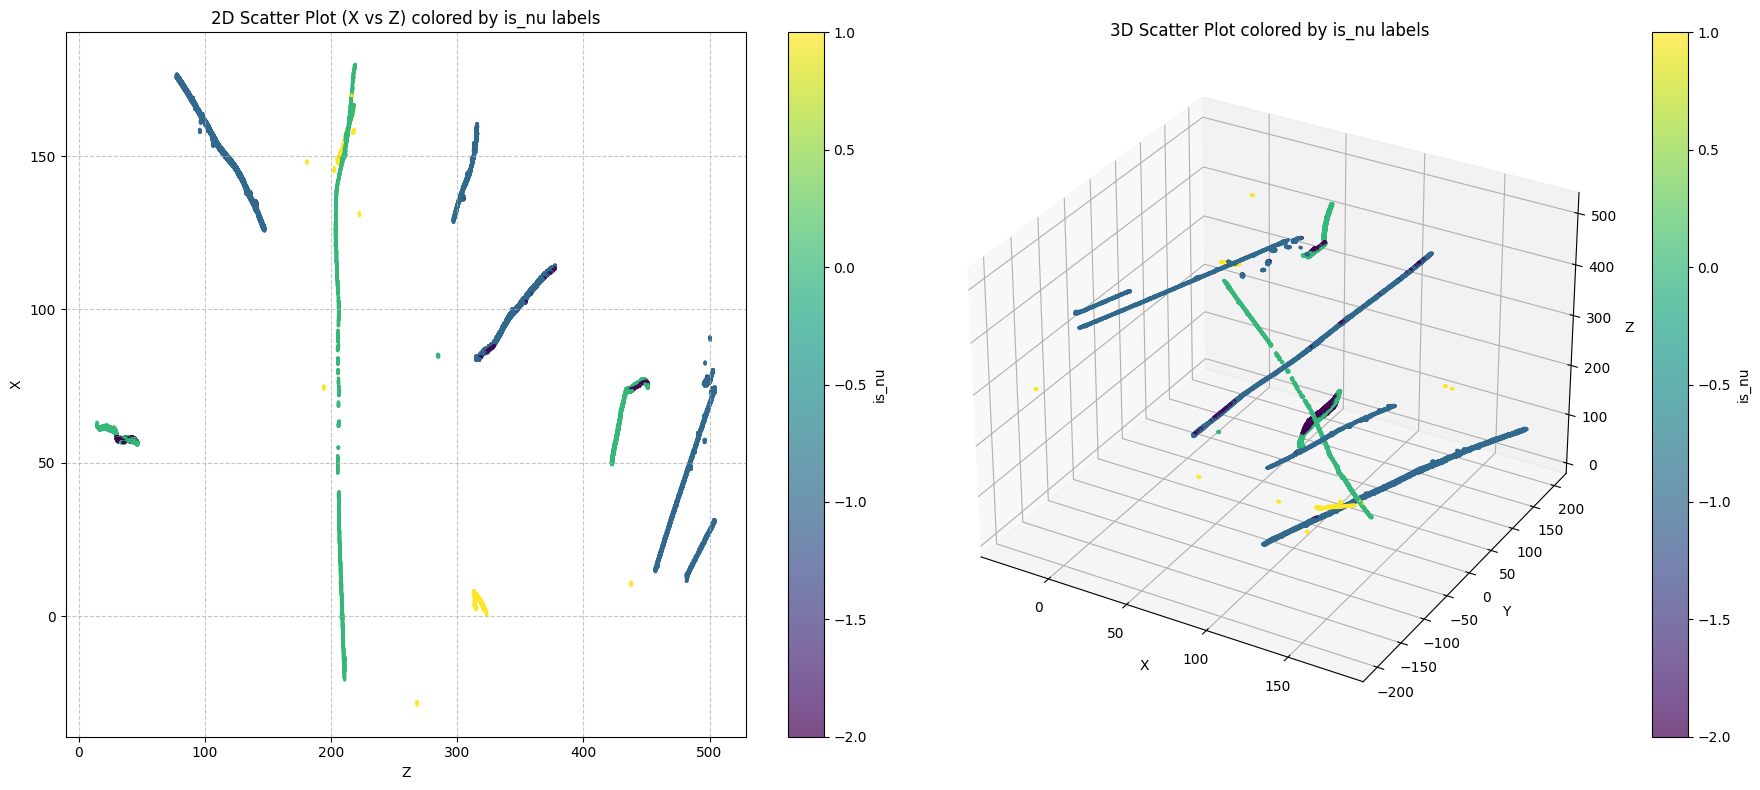

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
import sys

# Define file path to the labeled output file from labeling.py
labeled_file = "/exp/sbnd/app/users/yuhw/dl-clustering/sample/20250618/77451011_0/rec-lab-apa1-9.npz"  # Adjust this to your actual output file

# Check if file exists
if not os.path.exists(labeled_file):
    print(f"Error: Labeled file {labeled_file} not found.")
    sys.exit(1)

# Load labeled data
try:
    data = np.load(labeled_file)
    print(f"Successfully loaded data with keys: {data.files}")
except Exception as e:
    print(f"Error loading file: {str(e)}")
    sys.exit(1)

# Extract points and labels
points = data['points']
labels = data['is_nu']

print(f"Data shape: {points.shape}")
print(f"ppedges shape: {data['ppedges'].shape}")
print(f"Labels shape: {labels.shape}")
print(f"Unique labels: {np.unique(labels)}")

# Use a shifted version of labels for bincount since it doesn't accept negative values
shifted_labels = labels.astype(int) + 2  # Shift labels to make all values non-negative
counts = np.bincount(shifted_labels)
print(f"Label counts: {dict(zip(range(-2, len(counts)-2), counts))}")
# Normalize coordinates for plotting
x = points[:, 0]/10.
y = points[:, 1]/10.
z = points[:, 2]/10.

# Create figure with two subplots: 2D and 3D
fig = plt.figure(figsize=(18, 8))

# 2D Plot (X vs Z)
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(z, x, c=labels, s=2, cmap='viridis', alpha=0.7)
ax1.set_xlabel('Z')
ax1.set_ylabel('X')
ax1.set_title('2D Scatter Plot (X vs Z) colored by is_nu labels')
ax1.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, ax=ax1, label='is_nu')

# 3D Plot
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(x, y, z, c=labels, s=2, cmap='viridis', alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D Scatter Plot colored by is_nu labels')
plt.colorbar(scatter3d, ax=ax2, label='is_nu')

plt.tight_layout()
plt.show()

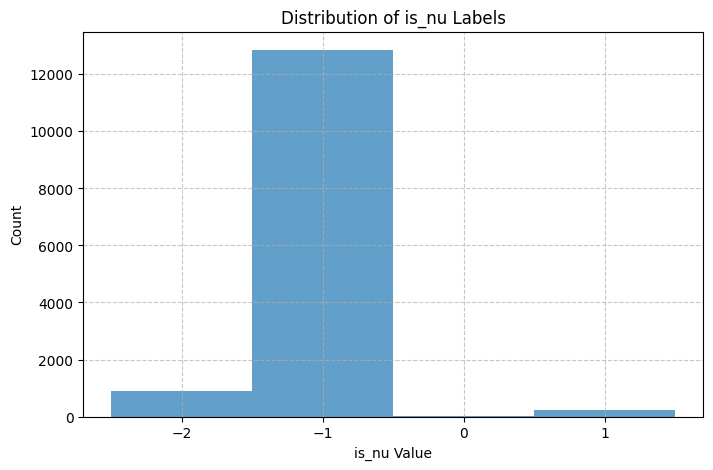

In [5]:
# Display distribution of labels
plt.figure(figsize=(8, 5))
plt.hist(labels, bins=np.arange(min(labels)-0.5, max(labels)+1.5, 1), alpha=0.7)
plt.xlabel('is_nu Value')
plt.ylabel('Count')
plt.title('Distribution of is_nu Labels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.unique(labels))
plt.show()